## LAMMPS Integration 

In [50]:
import openpathsampling as paths
import openpathsampling.engines.lammps as eng

In [51]:
import pandas as pd

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

We will run a test file and load all lines contained in _Lammps_ script

In [63]:
script = open('simple-lj.lammps','r').read()

Output the script. In our case a simple 256 atom LJ liquid.

In [64]:
print script

# 3d Lennard-Jones melt

units		lj
atom_style	atomic
atom_modify	map array

lattice		fcc 0.8442
region		box block 0 4 0 4 0 4
create_box	1 box
create_atoms	1 box
mass		1 1.0

velocity	all create 1.44 87287 loop geom

pair_style	lj/cut 2.5
pair_coeff	1 1 1.0 1.0 2.5

neighbor	0.3 bin
neigh_modify	delay 0 every 20 check no

fix		1 all nve

variable        fx atom fx

run 1


Create the engine as usual

In [55]:
engine = eng.Engine(
    inputs=script,
    options={
        'n_steps_per_frame': 100,
        'n_frames_max': 5000
    }
)

In [56]:
snap = engine.current_snapshot

In [57]:
snap.coordinates

Quantity(value=array([[  6.71591568e+00,   6.71204076e+00,   6.69920380e+00],
       [  8.26140999e-01,   8.54909084e-01,   1.70677164e-02],
       [  8.26080058e-01,   6.71212319e+00,   8.52072533e-01],
       [  1.60511914e-02,   8.59451911e-01,   8.34119868e-01],
       [  1.66978388e+00,   6.71273899e+00,   6.71721162e+00],
       [  2.51082874e+00,   8.34554020e-01,   6.70154349e+00],
       [  2.52286983e+00,   6.70264024e+00,   8.20375765e-01],
       [  1.66309512e+00,   8.55269718e-01,   8.52390006e-01],
       [  3.34631859e+00,   1.72249075e-02,   6.70319084e+00],
       [  4.20855665e+00,   8.60395722e-01,   3.46487244e-03],
       [  4.20273857e+00,   6.69795637e+00,   8.58672372e-01],
       [  3.36200928e+00,   8.33642384e-01,   8.36450542e-01],
       [  5.02290495e+00,   2.15510538e-03,   6.70701951e+00],
       [  5.87181664e+00,   8.42950452e-01,   6.69962172e+00],
       [  5.89580152e+00,   6.71478980e+00,   8.26417554e-01],
       [  5.05600919e+00,   8.46104904e-

An then just run it, as you are used to

In [49]:
%%time
traj = engine.generate(engine.current_snapshot, [paths.LengthEnsemble(2).can_append])

CPU times: user 1.72 s, sys: 10.7 ms, total: 1.73 s
Wall time: 1.73 s


Some simple plotting

```
 999 x      1 step(s) per frame    1.36 s
 999 x     10 step(s) per frame    2.68 s
 999 x    100 step(s) per frame   18.30 s
 999 x   1000 step(s) per frame  166.00 s 
   1 x 100000 step(s) per frame   16.40 s 
   1 x  10000 step(s) per frame    1.73 s
```

Plot the time development of the potential energy of a trajectory

In [33]:
traj

Trajectory[1000]

In [34]:
df = pd.DataFrame([sn.coordinates[0][1]._value for sn in traj])

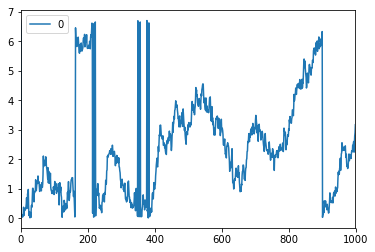

In [35]:
df.plot()

That's it. Go from there... Whohoo...